# Facebook Message Analyzer

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>

In [6]:
import os
import json
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 2

In [7]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [8]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0

In [9]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD:
            print(messages)
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 64 chats...
lauracadovares_8yjdd2j-7q
[{'sender_name': 'Laura Cadovares', 'timestamp_ms': 1486849875459, 'content': 'Laura sent a link.', 'share': {'link': 'https://www.washingtonpost.com/news/grade-point/wp/2017/02/11/yale-renames-calhoun-college-because-of-historic-ties-to-white-supremacy-and-slavery/', 'share_text': 'www.washingtonpost.com'}, 'type': 'Share'}, {'sender_name': 'Laura Cadovares', 'timestamp_ms': 1462120302293, 'content': 'Laura sent a link.', 'share': {'link': 'http://www.nytimes.com/2016/05/02/us/politics/malia-obama-to-attend-harvard-but-not-until-2017.html'}, 'type': 'Share'}, {'sender_name': 'Laura Cadovares', 'timestamp_ms': 1460302778226, 'content': 'Laura sent a link.', 'share': {'link': 'http://www.douglascountysentinel.com/news/superstar-astrophysicist-caps-successful-tedxdouglasville/article_6245d004-feac-11e5-9464-7fbe148a5ca9.html', 'share_text': 'www.douglascountysentinel.com'}, 'type': 'Share'}, {'sender_name': 'Laura Cadovares', 'timestamp_ms'

In [10]:
num_periods = 0
total_messages = 0
thank_yous = ["Thanks", "thanks", "Thank you", "thank you", "thx", "Thank u", "thank u"]
tycount = 0
pleases = ["Please", "please", "pls", "plz"]
plscount = 0
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]
            
            
            if name == "Chiara Darnton":
                total_messages += 1
                if message_content[-1] == "." and message_content[-2] != ".":
                    #print(message_content)
                    num_periods += 1
                for word in thank_yous:
                    if word in message_content and not "anksg" in message_content:
                        #print(message_content)
                        tycount += 1
                for word in pleases:
                    if word in message_content:
                        print(message_content)
                        plscount += 1
                
            
            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')
print('Found ' + str(num_periods) + ' messages ending in a period.')
print('Found ' + str(tycount) + ' thank yous and ' + str(plscount) + ' pleases.')
print('Found ' + str(total_messages) + ' total messages.')

#print('You end your messages with periods ' + str(num_periods/total_messages) + ' fraction of the time.')


0 - 1219 messages - francebelgiummemos_lymjmkh43w
1 - 273 messages - t3d8xtq3dw
2 - 258 messages - ralftartuferi_gr38urytga
3 - 182 messages - lauracadovares_8yjdd2j-7q
4 - 178 messages - jadeeastwood_1axh-xz36a
This is for u:) Read till the end! I sent an angel to watch over you last night, but it came back and asked "why?" The angel said, "angels don't watch over angels!" twenty angels are in your world. Ten are sleeping, nine of them are playing and one is reading this message. Someone has seen you struggling with some things and someone says it over. a blessing is coming your way. If you believe in someone send this message to 14 friends including me, if I don't get it back I guess I'm not one of them. As soon as you get 5 replies, someone you love will quietly surprise you... Not joking. Pass this message on. Please don't ignore it. you are being tested and someone is going to fix two big things tonight in your favor. If you believe in that someone drop everything and pass it on T

In [11]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)
    
def pie_plot(number, total):
    pl.pie([number, total-number],labels = ["rude","fine"])
    pl.tight_layout()
    pl.show()

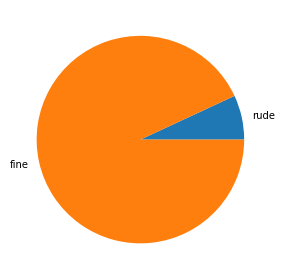

In [12]:
pie_plot(num_periods,total_messages)

In [13]:
matplotlib.pyplot.pie([num_periods, total_messages-num_periods],labels = ["rude","fine"]).show()


NameError: name 'matplotlib' is not defined

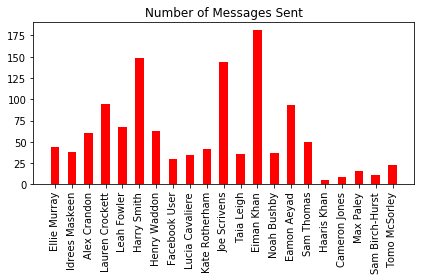

KeyboardInterrupt: 

In [ ]:
plot(0)